#                 医学专业论坛的数据爬取和分析

DXY.com丁香园是国内最大的医学综合网站之一，近期因“权健时间”更是火了一把，其医学论坛聚集了国内的专业人士。这里选取其中一个分论坛（消化内科）抓取数据来分析一下。

### 一、获取数据

从dxy.com获取数据

In [1]:
import pandas as pd
import numpy as np
import re
import requests
from lxml import html
from tqdm import tqdm  # 使用进度条

In [2]:
from collections import Counter

In [3]:
import warnings
warnings.filterwarnings('ignore')  # 忽略掉警告信息

In [4]:
def get_data(search_url, x_cha):  # define a function to get data
    data = tree.xpath(search_url.format(x_cha))  # 抓取内容
    out = pd.concat([pd.DataFrame(data_out), pd.DataFrame(data)],
                    axis=1)  # 取得每页数据，将各组数据按列合并
    return out  # return a dataframe of data in one sheet

 注意，下面抓取内容较多，共999个页面（前后14年）的论坛发帖信息，耗时估计需要5-10分钟。

In [5]:
df = pd.DataFrame([])
get_names = ['news', 'by', 'num calign', 'by ralign last']  # 从这里需要取得四项内容
get_date = ['author date', 'last date']   # 再获取作者发表日期和最后回复日期
# headers = {"User-Agent": "Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)","Referer": "http://www.zhihu.com/articles"}


with tqdm(range(1, 1000)) as t:
    for i in t:  # total 999 pages of news, can't get to NO.1000 page

        while True:  # 直到成功抓取
            try:
                url = "http://www.dxy.cn/bbs/board/188?order=1&tpg=%d" % i  # The url of forum
                contents = requests.get(url)
                break
            except:
                pass

        tree = html.fromstring(contents.text)

        # get data
        data, data_out = [], []
        for x in get_names:
            x_cha = "\'"+x+"\'"  # 给变量加上引号
            # 四项文字内容的path（其中有些news节点含有class属性为topic的小标题，会造成混乱，故需要排除）
            # 使用//取全部包括特殊符号的内容
            search_url = "//table[@class='post-table']/tbody/tr/td[@class={}]/a[not(@class='topic')]//text()"
            data_out = get_data(search_url, x_cha)  # 利用抓取函数取得数据
            if x in ['by', 'by ralign last']:  # 这2项数据带着日期和时间数据
                # 作者发表和最后回复的日期path
                search_url = "//table[@class='post-table']/tbody/tr/td[@class={}]/em//text()"
                data_out = get_data(search_url, x_cha)  # 利用抓取函数取得日期和时间数据
        df = pd.concat([df, data_out])  # 将各页数据合成
t.close()  # 关闭进度条防止反复运行时出现意外
df.columns = ['news', 'by', 'first date', 'num calign',
              'by ralign last', 'last date']  # 重新修改列名

100%|████████████████████████████████████████| 999/999 [03:39<00:00,  2.82it/s]


In [6]:
df = df.reset_index().iloc[:, 1:]  # 重排序，并整理去除无效index列

打开数据库看一下

In [7]:
df

,news,by,first date,num calign,by ralign last,last date
0,丁香早知道-1.22 | 工作 4 年，年终奖 100 万，你们呢？,丁香园,2019-01-21,5,叁麽,01-22 16:39
1,【专家述评】难治性、复发性食管良性狭窄的治疗策略,wuhanp,2019-01-12,3,sdbxf,01-22 07:43
2,血钾1.4，病因鉴别,陈雨菲,2018-01-19,7,空谷幽兰xy,01-19 23:38
3,肝功能异常,dxy_qars8d74,2019-01-22,0,dxy_qars8d74,01-22 16:57
4,胃镜死亡原因分析,2019的叶子,2019-01-22,0,2019的叶子,01-22 15:10
5,关于胃反流？或者说反流性食管炎,亦辰V8I2,2019-01-22,0,亦辰V8I2,01-22 12:36
6,2018 中国肝硬化腹水及相关并发症的管理指南-英文版,oxr1122,2019-01-22,0,oxr1122,01-22 12:06
7,老年患者腹痛、发热、黄疸，MRCP阴性，你猜结果是什么病？,wuhanp,2019-01-22,0,wuhanp,01-22 11:26
8,胃镜学习心得,知足常乐12,2019-01-21,3,天狼星2008,01-22 06:21
9,腹痛腹泻原因不明,cherish1988,2019-01-21,2,cherish1988,01-22 10:47


In [8]:
# 定义数据库文件名（这是没完成前用电信宽带抓取的完整论坛数据，因换了网络环境（移动宽带）后无法完整取得，所以保存了源数据）
data_file = "forum_data.csv"

In [9]:
# 写入csv文件
with open('data_CMCC.csv', 'w') as f:
    df.to_csv('data_CMCC.csv')

之前使用电信宽带可以取得3万多条数据，且很稳定，但后来换了移动宽带，发现每次都不能完整取得数据，且每次都不相同，为了中间的解说符合数据，在后续的数据分析中使用原来的到的数据“forum_data.csv”。

### 二、数据清洗

In [10]:
df = pd.read_csv(data_file).iloc[:, 1:]  # 读取论坛数据库

In [11]:
df.isna().any()  # 查空值

news              False
by                 True
first date         True
num calign         True
by ralign last     True
last date          True
dtype: bool

In [12]:
df[df.isna().values == True]  # 检查具体缺失值的数据

,news,by,first date,num calign,by ralign last,last date
12109,【试帖】食管癌术后早期营养,夜难绵,2013-03-31,NaN,NaN,04-05 08:47
12109,【试帖】食管癌术后早期营养,夜难绵,2013-03-31,NaN,NaN,04-05 08:47
12110,急性胰腺炎诊疗规范,NaN,NaN,NaN,NaN,04-17 22:46
12110,急性胰腺炎诊疗规范,NaN,NaN,NaN,NaN,04-17 22:46
12110,急性胰腺炎诊疗规范,NaN,NaN,NaN,NaN,04-17 22:46
12110,急性胰腺炎诊疗规范,NaN,NaN,NaN,NaN,04-17 22:46
12111,刚做胃镜碰到的问题,NaN,NaN,NaN,NaN,NaN
12111,刚做胃镜碰到的问题,NaN,NaN,NaN,NaN,NaN
12111,刚做胃镜碰到的问题,NaN,NaN,NaN,NaN,NaN
12111,刚做胃镜碰到的问题,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.dropna(axis=0)
df.isna().any()  # 查空值

news              False
by                False
first date        False
num calign        False
by ralign last    False
last date         False
dtype: bool

In [14]:
df.duplicated().any()  # 查询有无重复值

True

In [15]:
df[df.duplicated().values == True]  # 查询具体重复数据

,news,by,first date,num calign,by ralign last,last date
19577,一组滑动型食管裂孔疝胃镜图片,007sccx,2010-08-12,0.0,007sccx,08-12 14:03
20352,消化系统图片,missfxy,2010-05-04,0.0,missfxy,05-04 20:51
22023,本人今年内镜下止血部分图片1 杜氏溃疡治疗前,zbss701229,2009-08-19,0.0,zbss701229,08-19 22:57
23527,谁有历年消化内科主治医师考试真题,zhushuguang9521,2009-02-25,0.0,zhushuguang9521,02-25 22:52
23660,阵发性的呕吐，主诉胸骨后堵塞，腹泻，胃里难受，需吃点什么药啊？,erjian1213,2009-02-09,0.0,erjian1213,02-09 17:02
26496,求助有关胃息肉、结肠息肉电烧电凝延迟出血、穿孔的文章,ann2002ann,2008-03-28,0.0,ann2002ann,03-28 18:52
26793,病例讨论,menzhitao,2008-02-23,0.0,menzhitao,02-23 14:54
27171,谁有治疗性 乙肝疫苗的 信息,laotu12345,2008-01-01,0.0,laotu12345,01-01 14:06
27460,【求助】,zyk2007,2007-12-04,0.0,zyk2007,12-04 22:18
27978,Virtual Colonoscopy: A Practical Guide (Medica...,argui,2007-10-17,0.0,argui,10-17 22:10


In [16]:
df = df.drop_duplicates()  # 去重复值
df.duplicated().any()  # 再次检查确认有无重复

False

In [17]:
# 按fiest date排序时发现12087数据有误
df.sort_values('first date').tail()

,news,by,first date,num calign,by ralign last,last date
5,求助：作业方向。,我为小消医,2019-01-18,0.0,我为小消医,01-18 21:53
4,胃十二指肠溃疡,kopmer,2019-01-18,0.0,kopmer,01-18 22:07
3,学医真的好难。。。。,chenlb888,2019-01-18,0.0,chenlb888,01-18 22:13
8,12岁男孩被诊断为克罗恩病，半年内已使用4次类克，还有好的治疗措施吗？,duckling,2019-01-18,0.0,duckling,01-18 14:48
12087,\r\r\n,lw56102,最后阅读,5.0,02115227,阅贴时间


In [18]:
df = df.drop(12087)  # 删除第12087数据

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34928 entries, 0 to 34966
Data columns (total 6 columns):
news              34928 non-null object
by                34928 non-null object
first date        34928 non-null object
num calign        34928 non-null float64
by ralign last    34928 non-null object
last date         34928 non-null object
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


### 三、分析处理数据

In [20]:
df['num calign'].describe()  # 查看帖子回复情况的统计值

count    34928.000000
mean         5.855102
std         22.571681
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1646.000000
Name: num calign, dtype: float64

回复最多的帖子有1646次，平均回复5.855102次。

 查看回复最多的100条帖子

In [21]:
df_re = df.sort_values('num calign', ascending=False).iloc[:100, :]  # 按回复降序排列
df_re.head()

,news,by,first date,num calign,by ralign last,last date
16470,我珍藏的内镜下经典图片，都是自己做内镜时拍的，原创，不需叮当,zbss701229,2011-07-17,1646.0,求知者玉平,10-20 20:52
26769,【原创】消化内科常用药个人小总结,tom628279cjz,2008-02-26,1366.0,POJ9,12-15 17:08
21105,我国消化内科常见疾病诊疗指南,唐朝农民,2009-12-30,1003.0,wangyichem,10-29 17:18
11643,看丁香园自己出的书---------内科疑难病例—消化分册（高清版）,minge1986,2013-05-24,926.0,半世晨晓,10-14 00:55
26151,胃镜操作心得-2011（pdf图文并茂版本同时上传）,天狼星2008,2008-05-03,786.0,天狼星2008,01-18 21:09


 前100热门帖子有无同一个人发表的，显示是有的

In [22]:
df_re['by'].duplicated().any()  # 前100热门帖子有无同一个人发表的

True

In [23]:
df_re[df_re['by'].duplicated()].count()

news              20
by                20
first date        20
num calign        20
by ralign last    20
last date         20
dtype: int64

In [24]:
Counter(df_re['by']).most_common(5)  # 在回复最多的前100个帖子中，发表数量前几位的作者，估计其中有消化界资深专家

[('minge1986', 6),
 ('lw56102', 4),
 ('xmlming', 3),
 ('bashenan0535', 3),
 ('baiyu1998', 2)]

mingge1986并不是消化界的专家，信息显示是眼科专家，但是发帖量很多，且很多是实用资料，这也是论坛内比较受欢迎的一种。 lw56102是来自山东济南的消化内科医师，但是知名度并不高。只有baiyu1998是来自长海医院的知名专家，也是版主，分析可能是大专家平时比较忙，难有时间打理论坛上的事物，这也是目前互联网+医学上遇到的问题，大医院的专家对网络医疗的参与度较低。

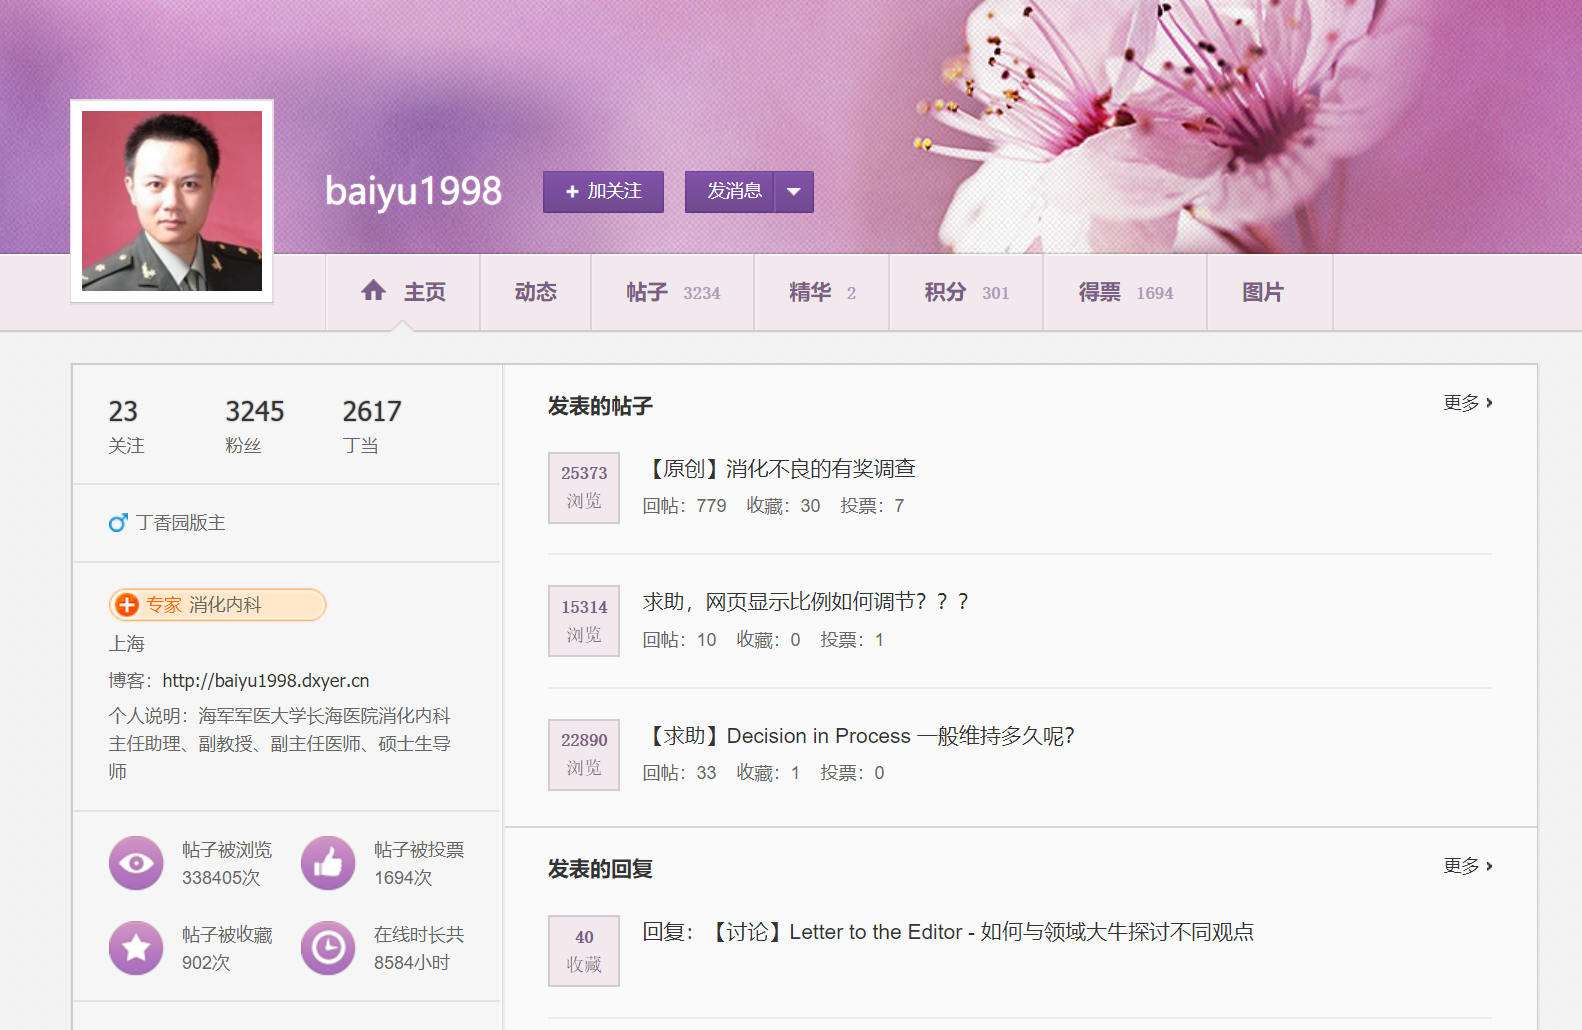

下面我试用图形比较一下这五位最活跃者的发帖情况，和全论坛发帖数量最多的五位的对比。

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

Text(0.5, 1.0, '回复最多的前五名的发帖量')

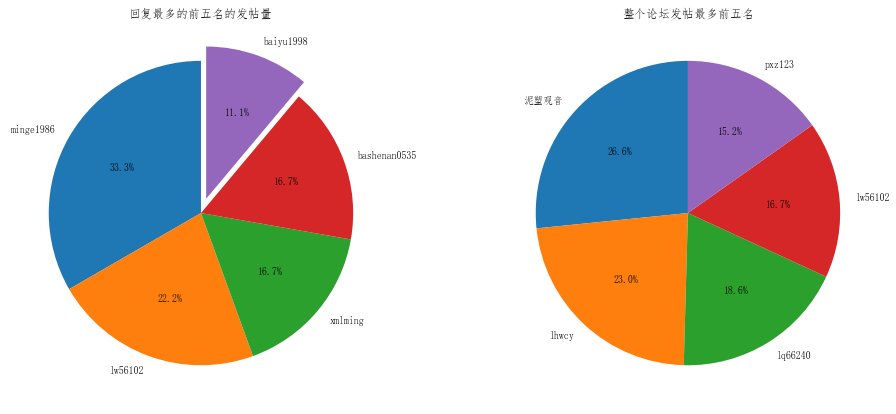

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
authors = Counter(df['by']).most_common(5)
author_100 = Counter(df_re['by']).most_common(5)
au = [i[0] for i in authors]
num = [i[1] for i in authors]
au_100 = [i[0] for i in author_100]
num_100 = [i[1] for i in author_100]
explode = (0, 0, 0, 0, 0.1)

axes[1].pie(num, labels=au, autopct='%1.1f%%', startangle=90)
axes[0].pie(num_100, explode=explode, labels=au_100,
            autopct='%1.1f%%', startangle=90)
axes[1].set_title("整个论坛发帖最多前五名")
axes[0].set_title("回复最多的前五名的发帖量")

只有一个人重合：lw56102，可见，回复的多的人代表发帖质量高，和发帖数量不是一样的概念，后者可能因能力等因素发帖质量不高。

下面我再试试用时间排序可否找出一些论坛发展情况。

按照时间排序

In [28]:
df['counts'] = 1  # 插入一列用来计数
df.head()

,news,by,first date,num calign,by ralign last,last date,counts
0,【专家述评】难治性、复发性食管良性狭窄的治疗策略,wuhanp,2019-01-12,1.0,wuhanp,01-12 22:18,1
1,让医生意想不到的腹痛原因（鱼刺）,天朗气清will,2016-05-18,186.0,天狼星2008,01-10 20:24,1
2,「科室患教会」可以这么玩? 10 个免费合作名额速抢！,丁香播咖,2019-01-10,0.0,丁香播咖,01-10 13:33,1
3,学医真的好难。。。。,chenlb888,2019-01-18,0.0,chenlb888,01-18 22:13,1
4,胃十二指肠溃疡,kopmer,2019-01-18,0.0,kopmer,01-18 22:07,1


In [29]:
df_dateindex = df.sort_values('first date')  # 设置按发表日期排序

In [30]:
df_dateindex.index = pd.to_datetime(df_dateindex['first date'])  # 设置发表日期为index
df_dateindex = df_dateindex["2005":"2018"]  # 因2019年数据量极少，故予以舍弃

In [31]:
df_resample_Y = df_dateindex.resample('1Y')  # 按年分类统计
df_resample_Y = df_resample_Y

In [32]:
count_by_year = df_resample_Y['counts'].sum()  # 统计每年的发帖量
count_by_year

first date
2005-12-31     852
2006-12-31    3145
2007-12-31    3769
2008-12-31    3243
2009-12-31    2827
2010-12-31    2875
2011-12-31    3135
2012-12-31    2386
2013-12-31    2691
2014-12-31    2084
2015-12-31    1753
2016-12-31    2139
2017-12-31    1795
2018-12-31    2100
Freq: A-DEC, Name: counts, dtype: int64

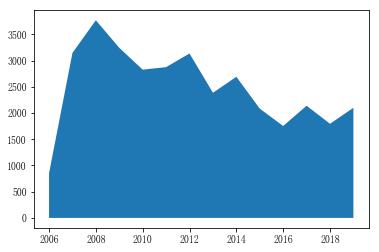

In [33]:
plt.fill_between(count_by_year.index, count_by_year)  # 画图看一下论坛逐年发帖数量趋势

In [34]:
mean_by_year = df_resample_Y['num calign'].sum()  # 统计每年每贴的平均回复量
mean_by_year

first date
2005-12-31     4733.0
2006-12-31    17247.0
2007-12-31    19723.0
2008-12-31    17506.0
2009-12-31    18226.0
2010-12-31    15154.0
2011-12-31    19151.0
2012-12-31    13435.0
2013-12-31    20851.0
2014-12-31    10114.0
2015-12-31     8933.0
2016-12-31    15606.0
2017-12-31    12411.0
2018-12-31    11195.0
Freq: A-DEC, Name: num calign, dtype: float64

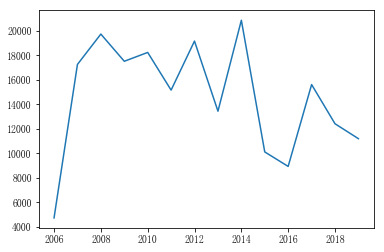

In [35]:
plt.plot(mean_by_year.index, mean_by_year)  # 画图看一下论坛每年平均回复数的趋势

从第2张图看，似乎论坛在发展到了2013年后，平均回复数也出现了滑坡，反映出发帖的质量可能也有下降。

微博用户年规模数据是：2012：30861，2013，28078，2014：24884，2015：23045，2016：27143，2017：31601，2018：22741，单位（万人）；
微信采用了月活跃用户来表达用户的在线活跃程度：其数据是2014-2018年年末分别达到5亿月活、 6.97亿月活、 8.89亿月活、9.89亿月活和10.4亿月活。

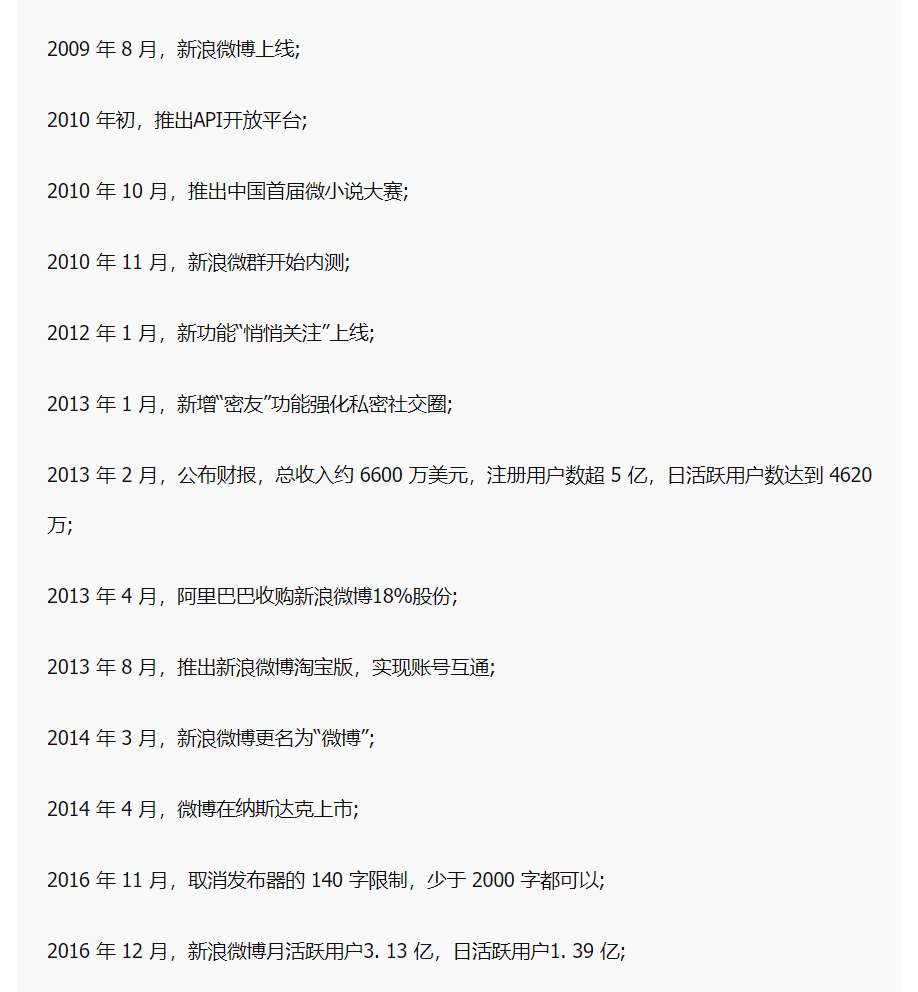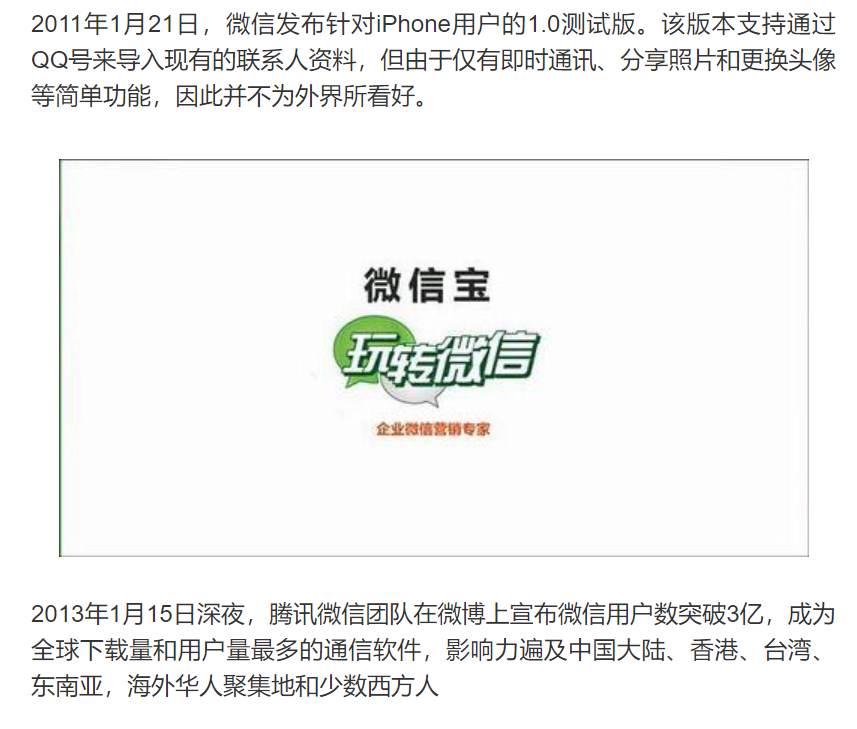

In [36]:
### 建立数据表
p_weibo = pd.period_range('2012', '2018', freq='Y')  # weibo时间索引
p_wechart = pd.period_range('2014', '2018', freq='Y')  # wechart时间索引
weibo = pd.DataFrame(['30861', '28078', '24884', '23045',
                      '27143', '31601', '22741'], index=p_weibo, columns=['weibo'])
wechart = pd.DataFrame(['5', '6.97', '8.89', '9.89', '10.4'],
                       index=p_wechart, columns=['wechart'])

In [37]:
ww = pd.concat([wechart, weibo], axis=1)
ww

,wechart,weibo
2012,NaN,30861
2013,NaN,28078
2014,5,24884
2015,6.97,23045
2016,8.89,27143
2017,9.89,31601
2018,10.4,22741


In [38]:
counts = pd.concat([count_by_year, mean_by_year], axis=1)
# counts = counts.drop(14) #14数据是2019年的，这里舍去，但之前已经处理掉了，所以注释掉。
counts.index = pd.period_range('2005', '2018', freq='Y')  # 重新改变年份的数据格式。
counts.head()

,counts,num calign
2005,852,4733.0
2006,3145,17247.0
2007,3769,19723.0
2008,3243,17506.0
2009,2827,18226.0


In [39]:
# 组合论坛的每年发帖量，平均回复量，以及微博、微信的数据
df_all = pd.concat([counts, ww], axis=1)
df_all = df_all.replace(np.nan, 0)

In [40]:
from sklearn.preprocessing import MinMaxScaler

df_all_minmax = MinMaxScaler().fit_transform(df_all)  # 将数据处理成可对比形态

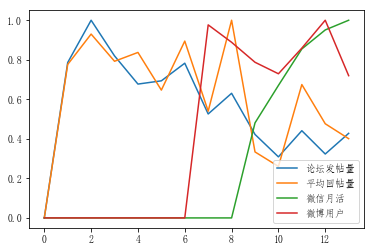

In [41]:
df_all_minmax = pd.DataFrame(df_all_minmax, columns=[
                             '论坛发帖量', '平均回帖量', '微信月活', '微博用户'])  # 给予图表中文说明
df_all_minmax.plot()

In [42]:
df_all_minmax.corr()  # 查看相关系数

,论坛发帖量,平均回帖量,微信月活,微博用户
论坛发帖量,1.000000,0.886255,-0.497643,-0.458058
平均回帖量,0.886255,1.000000,-0.422837,-0.256361
微信月活,-0.497643,-0.422837,1.000000,0.662580
微博用户,-0.458058,-0.256361,0.662580,1.000000


论坛发帖量和平均回帖量相关性最高，但意义不大，这里看到微信月活数和微博用户，分别和论坛发帖量呈互相关，而微博用户数与平均回帖量相关性不大（负相关），但微信月活数，和平均回帖量扔保持了稍高的负相关，猜测似乎微信的兴起，特别是医学专业讨论群的大量出现（本人手机里就十几个这种群），对论坛里讨论疑难病例或者专业学习等有一定冲击。

丁香园的消化论坛经过2007-2008年的高峰后，发帖量出现逐年下降的趋势，结合上面分析，考虑可能和这几年微博、微信这种自媒体的出现，减少了人们上论坛的机会有关。这反映了互联网的发展历程，医生群体也是其中一员，现在很多人更热衷于微信群或者朋友圈里进行讨论和发布进展，论坛自然也就少有人问津了

### 词频统计

In [43]:
!pip install jieba

In [44]:
!pip install wordcloud
# wordcloud通过！pip install wordcloud下载安装失败，通过Anaconda Prompt安装成功

In [45]:
import jieba
import jieba.analyse
import wordcloud  # 词云展示库
from PIL import Image  # 图像处理库

In [46]:
news = df[['news', 'first date']].sort_values('first date')
with open('news_data.csv', 'w') as f:
    news.to_csv('news_data.csv')  # 先将数据存档，避免后续调试常从头开始。

In [47]:
news = pd.read_csv('news_data.csv')

In [48]:
news['news'].head()

0                                       『请教消化内科的发展前景！』
1    The Role of Surgery in the Management of Porta...
2                                           一AFP持续升高患者
3                                   虚拟实验室-哺乳类的消化系统（老鼠）
4                                            乙肝两对半五项阳性
Name: news, dtype: object

In [49]:
punctuation = """【】★“”！，。？、~@#￥%……&*（）！？｡――＂＃＄％＆＇<<>>（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}]+".format(punctuation)
remove_words = [u'的', u'，', u'和', u'是', u'随着', u'对于', u'对', u'等', u'能', u'都', u'。', u' ', u'、',
                u'中', u'-', u'在', u'了', u'通常', u'如果', u'我们', u'需要', u'什么', u'下', u'一', u'吗', u'有']  # 自定义去除词库

news_list = []
for new in tqdm(news['news']):
    new = str(new)
    new = re.sub(re_punctuation, '', new)  # 去掉一些没用的符号

    seg_list_exact = jieba.cut(new, cut_all=False)  # 精确模式分词
    for word in seg_list_exact:
        if word not in remove_words:  # 如果不在去除词库中
            news_list.append(word)  # 将分词加入 list 中。

news_list

  0%|                                                | 0/34928 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.040 seconds.
Prefix dict has been built succesfully.
100%|██████████████████████████████████| 34928/34928 [00:04<00:00, 7471.11it/s]


['请教',
 '消化',
 '内科',
 '发展前景',
 'The',
 'Role',
 'of',
 'Surgery',
 'in',
 'the',
 'Management',
 'of',
 'Portal',
 'HT',
 'AFP',
 '持续',
 '升高',
 '患者',
 '虚拟',
 '实验室',
 '哺乳类',
 '消化系统',
 '老鼠',
 '乙肝',
 '两对半',
 '五项',
 '阳性',
 '请',
 '大家',
 '来',
 '会诊',
 '一个',
 '病例',
 '陕西省',
 '病历',
 '书写',
 '规范',
 '讲座',
 '消化性',
 '溃疡',
 '营养',
 '治疗',
 '原则',
 '肿瘤性',
 '相关',
 '胰腺炎',
 '讨论',
 '胃镜',
 '检查',
 '前',
 '是否',
 '要',
 '进行',
 'HIV',
 '检查',
 'Chronic',
 'intermittent',
 'abdominal',
 'pain',
 'Small',
 'bowel',
 'obstruction',
 'in',
 'a',
 'young',
 'woman',
 '(',
 '共享',
 '消化科',
 '病历',
 '书写',
 '实例',
 '大',
 '病历',
 '门诊',
 '病历',
 '病例',
 '讨论',
 '上腹',
 '间歇',
 '痛',
 '多年',
 '近日',
 '呕血',
 '持续',
 '左中',
 '上',
 '腹痛',
 '2',
 '月余',
 '咽部',
 '异物感',
 '尿',
 '黄',
 '胸闷',
 '2',
 '3',
 '年',
 '病例',
 '讨论',
 '肝硬化',
 '腹水',
 '肾衰',
 '原因',
 '不明',
 '请教',
 '同道',
 '们',
 '一个',
 '关于',
 '溃疡性',
 '结肠炎',
 '问题',
 '急性',
 '胰腺炎',
 '治疗',
 '研究进展',
 '从',
 '外科手术',
 '到',
 '介入',
 '治疗',
 '转变',
 '伤寒',
 '并发症',
 '为什么',
 '可以',
 '支气管',
 '肺炎',
 '无症状',
 '人群',
 '免疫组化',

词频统计

In [50]:
word_c = Counter(news_list)  # 对分词词频统计
word_top10 = word_c.most_common(10)  # 获取前10的词
print(word_top10)

[('治疗', 3230), ('求助', 2183), ('消化', 1657), ('内镜', 1641), ('诊断', 1478), ('原因', 1374), ('如何', 1230), ('请教', 1196), ('胃镜', 1180), ('病例', 1165)]


对词频分析前10位数据，提示这个论坛的专业特性，大部分都是上论坛求助关于消化或内镜（包括胃镜）方面的诊疗方面的问题。

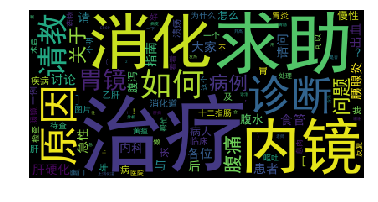

In [51]:
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', max_words=100, max_font_size=100)
wc.generate_from_frequencies(word_c)  # 从字典生成词云
plt.imshow(wc)  # 显示词云
plt.axis('off')  # 关闭坐标轴
plt.show()  # 显示图像

最后通过显示词云，可以直观的体现这个论坛的特点是以专业问题解答为主的，其专业内容也有所体现（比如：消化，内镜，胃镜，腹痛，肝硬化等）

这只是对一个专业论坛的粗浅挖掘和分析，请多多指教，谢谢！